In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_path="/content/drive/MyDrive/AI and Machine Learning/FruitinAmazon/test"
train_path="/content/drive/MyDrive/AI and Machine Learning/FruitinAmazon/train"

In [ ]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation


rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(img_height, img_width, 3)),

    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),

    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(6, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,205,350 (16.04 MB)

 Trainable params: 4,205,350 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_callback = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


history =model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    batch_size=16,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1609 - loss: 2.9591
Epoch 1: val_loss improved from inf to 1.36771, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1554 - loss: 3.1213 - val_accuracy: 0.8333 - val_loss: 1.3677
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.2587 - loss: 2.5363
Epoch 2: val_loss did not improve from 1.36771
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 800ms/step - accuracy: 0.2669 - loss: 2.5118 - val_accuracy: 0.3889 - val_loss: 1.4647
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.5457 - loss: 1.6929
Epoch 3: val_loss did not improve from 1.36771
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - accuracy: 0.5412 - loss: 1.6920 - val_accuracy: 0.8889 - val_loss: 1.5060
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.6441 - loss: 1.5776
Epoch 4: val_loss improved from 1.36771 to 1.26616, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 547ms/step - accuracy: 0.6497 - loss: 1.5725 - val_accuracy: 0.8333 - val_loss: 1.2662
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.5347 - loss: 1.3558
Epoch 5: val_loss improved from 1.26616 to 0.90968, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 600ms/step - accuracy: 0.5365 - loss: 1.3429 - val_accuracy: 0.6667 - val_loss: 0.9097
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.5538 - loss: 1.0891
Epoch 6: val_loss did not improve from 0.90968
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - accuracy: 0.5612 - loss: 1.0790 - val_accuracy: 0.6667 - val_loss: 1.1495
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.8808 - loss: 0.7671
Epoch 7: val_loss did not improve from 0.90968
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 771ms/step - accuracy: 0.8759 - loss: 0.7661 - val_accuracy: 0.7778 - val_loss: 0.9603
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9005 - loss: 0.5465
Epoch 8: val_loss improved from 0.90968 to 0.49046, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step - accuracy: 0.8976 - loss: 0.5471 - val_accuracy: 0.9444 - val_loss: 0.4905
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.9601 - loss: 0.3459
Epoch 9: val_loss did not improve from 0.49046
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 465ms/step - accuracy: 0.9596 - loss: 0.3505 - val_accuracy: 0.8889 - val_loss: 0.5619
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9797 - loss: 0.1802
Epoch 10: val_loss did not improve from 0.49046
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 475ms/step - accuracy: 0.9813 - loss: 0.1793 - val_accuracy: 0.6667 - val_loss: 0.6125
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9601 - loss: 0.1437
Epoch 11: val_loss improved from 0.49046 to 0.33030, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - accuracy: 0.9596 - loss: 0.1400 - val_accuracy: 0.8889 - val_loss: 0.3303
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.9797 - loss: 0.0802
Epoch 12: val_loss did not improve from 0.33030
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 546ms/step - accuracy: 0.9813 - loss: 0.0765 - val_accuracy: 0.9444 - val_loss: 0.4558
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.9606 - loss: 0.0946
Epoch 13: val_loss did not improve from 0.33030
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 818ms/step - accuracy: 0.9566 - loss: 0.1006 - val_accuracy: 0.8889 - val_loss: 0.4303
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9705 - loss: 0.0747
Epoch 14: val_loss improved from 0.33030 to 0.32475, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 539ms/step - accuracy: 0.9674 - loss: 0.0802 - val_accuracy: 0.7778 - val_loss: 0.3247
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 1.0000 - loss: 0.0204
Epoch 15: val_loss did not improve from 0.32475
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 0.7778 - val_loss: 0.4213
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.9803 - loss: 0.0613
Epoch 16: val_loss improved from 0.32475 to 0.14298, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 542ms/step - accuracy: 0.9783 - loss: 0.0643 - val_accuracy: 0.9444 - val_loss: 0.1430
Epoch 17/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 1.0000 - loss: 0.0200
Epoch 17: val_loss did not improve from 0.14298
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 1.0000 - loss: 0.0200 - val_accuracy: 0.8889 - val_loss: 0.3124
Epoch 18/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.9902 - loss: 0.0585
Epoch 18: val_loss did not improve from 0.14298
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 808ms/step - accuracy: 0.9891 - loss: 0.0601 - val_accuracy: 0.8889 - val_loss: 0.5679
Epoch 19/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 1.0000 - loss: 0.0243
Epoch 19: val_loss did not improve from 0.14298
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 691ms/step - accuracy: 1.0000 - loss: 0.0253 - val_accuracy: 0.8889 - val_loss: 0.5991
Epoch 20/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 1.0000 - loss: 0.0083
Epoch 20: val_loss did not improve from 0.14298
3/3 ━━━━

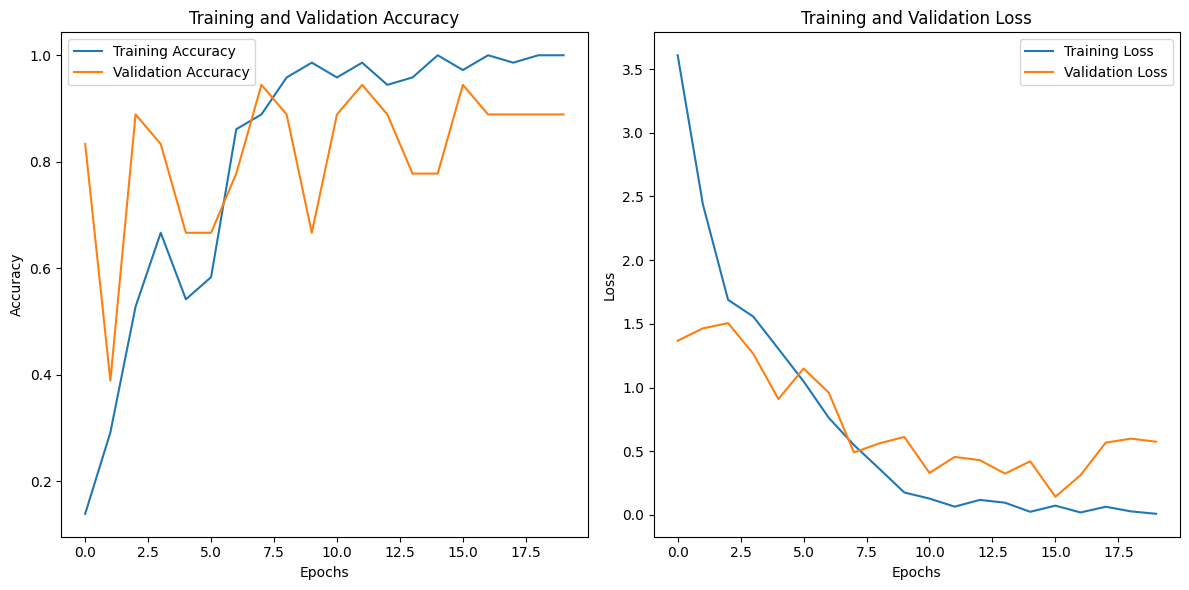

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
)

# Apply normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
model.save("fruit_classification_model.h5")
# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.7621


Test Loss: 0.7620907425880432
Test Accuracy: 0.800000011920929


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# List of class labels (replace with your actual labels)
class_names = ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

# Get predictions on the test set
predictions = model.predict(test_ds)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=-1)

# Get true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    # For categorical labels, labels are already one-hot encoded
    true_labels.extend(np.argmax(labels.numpy(), axis=-1))  # Convert one-hot encoded labels to class indices
true_labels = np.array(true_labels)

# Print classification report with actual class names
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
              precision    recall  f1-score   support

        acai       0.71      1.00      0.83         5
     cupuacu       0.71      1.00      0.83         5
    graviola       1.00      1.00      1.00         5
     guarana       1.00      0.40      0.57         5
     pupunha       0.71      1.00      0.83         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.80        30
   macro avg       0.86      0.80      0.77        30
weighted avg       0.86      0.80      0.77        30



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Define image size (same as during training)
img_height = 128  # Example image height
img_width = 128   # Example image width

# List of class labels (replace this with your actual class labels)
class_names = ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

# Path to the test image
test_image_path = "/content/drive/MyDrive/AI and Machine Learning/FruitinAmazon/test/tucuma/download (1).jpeg"

# Load the image and resize to the target size
img = image.load_img(test_image_path, target_size=(img_height, img_width))  # Use the same target size as during training

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add batch dimension (since the model expects a batch of images)
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, img_height, img_width, 3)

# Apply the same rescaling (normalization) as in training
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]
img_array = rescale(img_array)  # Apply rescaling

# Make prediction using the model
predictions = model.predict(img_array)

# Convert predicted probabilities to class label
predicted_class_index = np.argmax(predictions, axis=-1)[0]  # Get the class with the highest probability
predicted_class_name = class_names[predicted_class_index]  # Map to the actual class name

print(f"The predicted class is: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
The predicted class is: tucuma
